In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')


# 10.1

### 10.1.6

In [2]:
# outer boundary
# G = 1
# Y = a/M

thetas = np.arange(0,np.pi/2,0.01)

@np.vectorize
def omega(theta,a,M):
    Y = float(a/M)
    return Y**2/(a*(1 + np.sqrt(1 - (Y*np.cos(theta))**2) + (Y*np.sin(theta))**2))

@np.vectorize
def a_omega(theta,Y):
    return Y**2/(1 + np.sqrt(1 - (Y*np.cos(theta))**2) + (Y*np.sin(theta))**2)
    

def plot(Y):
    plt.figure()
    plt.plot(180*thetas/np.pi,a_omega(thetas,Y))
    plt.xlabel('$\Theta$')
    plt.ylabel('a$\Omega$')
    plt.title('Outer ergosphere surface')
    plt.show()

ipw.interact(plot, Y=(0,1,0.01))

interactive(children=(FloatSlider(value=0.0, description='Y', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot(Y)>

### 10.1.7

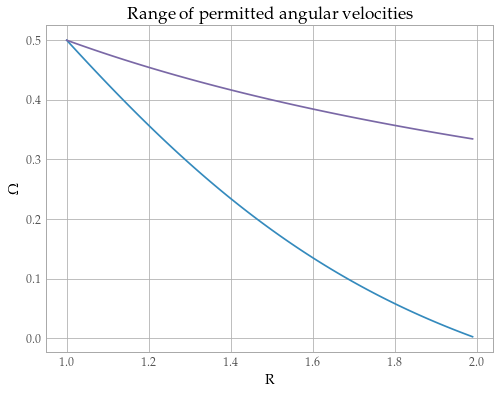

In [3]:
# equatorial section of extreme Kerr ergosphere

# R = r/GM

@np.vectorize
def omega1(R):
    return 1 - R**2/(R**2 - R + 2)

@np.vectorize
def omega2(R):
    return 1/(R + 1)

Rs = np.arange(1,2,0.01)

plt.figure()
plt.plot(Rs,omega1(Rs))
plt.plot(Rs,omega2(Rs))
plt.xlabel('R')
plt.ylabel('$\Omega$')
plt.title('Range of permitted angular velocities')
plt.show()


In [34]:
# trying polar plot

# GM = 1

@np.vectorize
def omega1(a,r,t):
    if r < 1 + np.sqrt(1 - a**2) or r > 1 + np.sqrt(1 - (a*np.cos(t))**2):
        return -1
    rho_square = r**2 + (a*np.cos(t))**2
    Delta = r**2 - 2*r + a**2
    return (2*a*r - rho_square*np.sqrt(Delta)/np.sin(t))/(rho_square*(r**2 + a**2) + 2*r*(a*np.sin(t))**2)

@np.vectorize
def omega2(a,r,t):
    if r < 1 + np.sqrt(1 - a**2) or r > 1 + np.sqrt(1 - (a*np.cos(t))**2):
        return -1
    rho_square = r**2 + (a*np.cos(t))**2
    Delta = r**2 - 2*r + a**2
    return (2*a*r + rho_square*np.sqrt(Delta)/np.sin(t))/(rho_square*(r**2 + a**2) + 2*r*(a*np.sin(t))**2)

thetas = np.arange(0.01,np.pi/2,0.01)
rs = np.arange(1,2,0.01)
values1 = np.zeros((len(rs),len(thetas)))
values2 = np.zeros((len(rs),len(thetas)))
thetass,rss = np.meshgrid(thetas,rs)


%matplotlib notebook

# -k = log10(1-a)

def plot(k):
    a = 1 - 10**(-k)
    for i,t in enumerate(thetas):
        for j,r in enumerate(rs):
            values1[j,i] = omega1(a,r,t)
            values2[j,i] = omega2(a,r,t)
    fig, axes = plt.subplots(ncols=2, 
                             subplot_kw=dict(projection='polar'), 
                             constrained_layout=True,
#                              tight_layout=True,
#                              sharey=True,
                             figsize=(8,4),
                             dpi=120)
    for ax in axes:
        ax.set_thetamin(0)
        ax.set_thetamax(90)
        ax.set_rlim([0.98,2.02])
        ax.set_theta_zero_location('N')
    levels=np.linspace(0, .5, num=200)
    c = axes[0].contourf(thetass, rss, values1, levels = levels)
    c2 = axes[1].contourf(thetass, rss, values2, levels = levels)
    # Range of the colors was up to .7
    # but the maximum omega is .5
    fig.colorbar(c, label="$\\Omega$", pad=.2, fraction=0)
    # ax1.plot(thetas,(1 + np.sqrt(1 - a**2))*np.ones(len(thetas)))
    # ax1.plot(thetas,1 + np.sqrt(1 - (a*np.cos(thetas))**2))
    axes[0].set_title("Minimum $\\Omega$")
    axes[1].set_title("Maximum $\\Omega$")
    fig.suptitle('a = %.4f' %a)
    
    
# ipw.interact(plot, a = (0,1,0.01))
ipw.interact(plot, k = (0,4,0.1))

interactive(children=(FloatSlider(value=2.0, description='k', max=4.0), Output()), _dom_classes=('widget-inter…

<function __main__.plot(k)>

In [5]:
omega1(0.9,1.9,0.01)

array(-1)

<IPython.core.display.Javascript object>


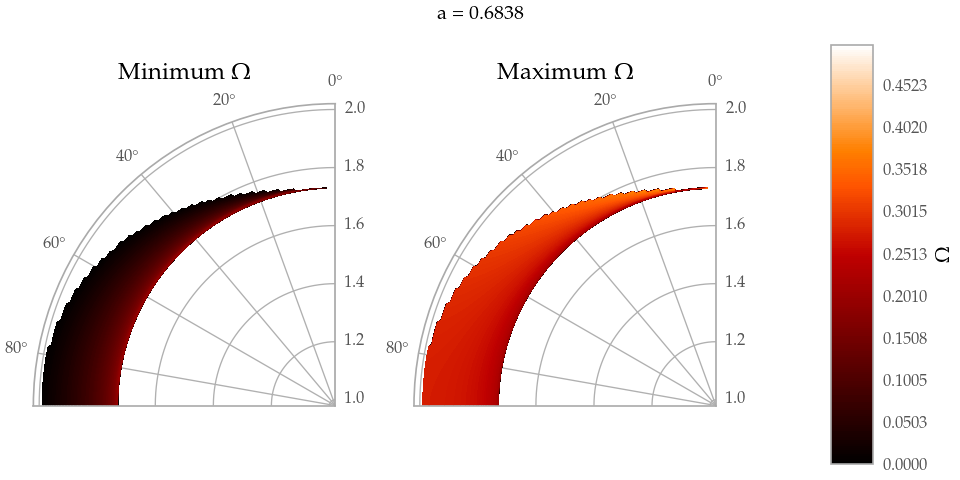

<IPython.core.display.Javascript object>


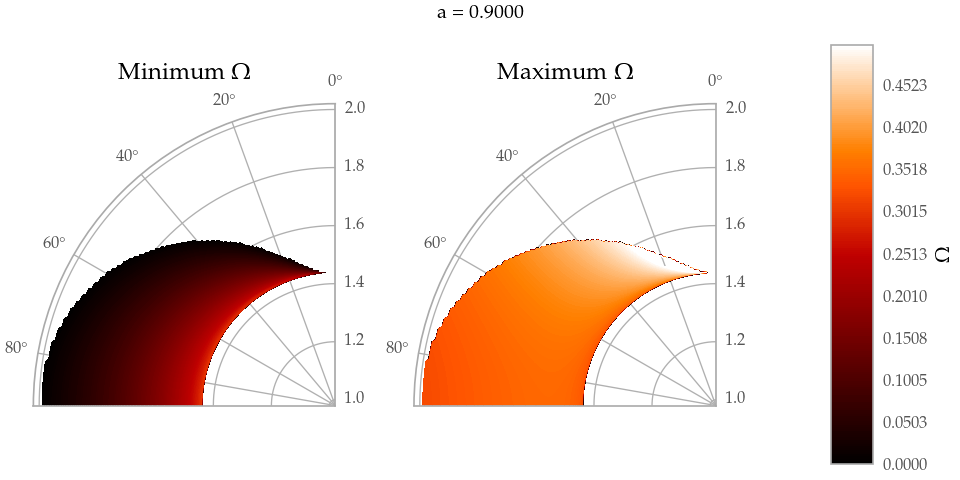

<IPython.core.display.Javascript object>


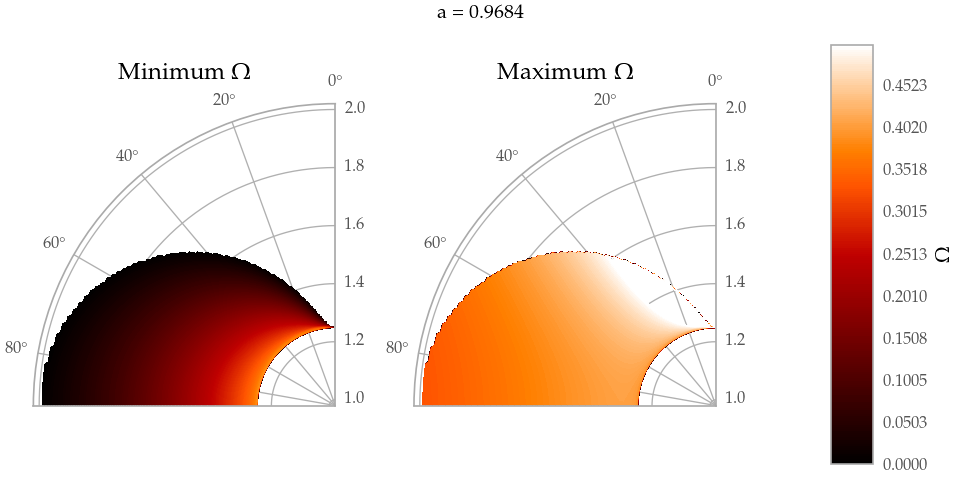

<IPython.core.display.Javascript object>


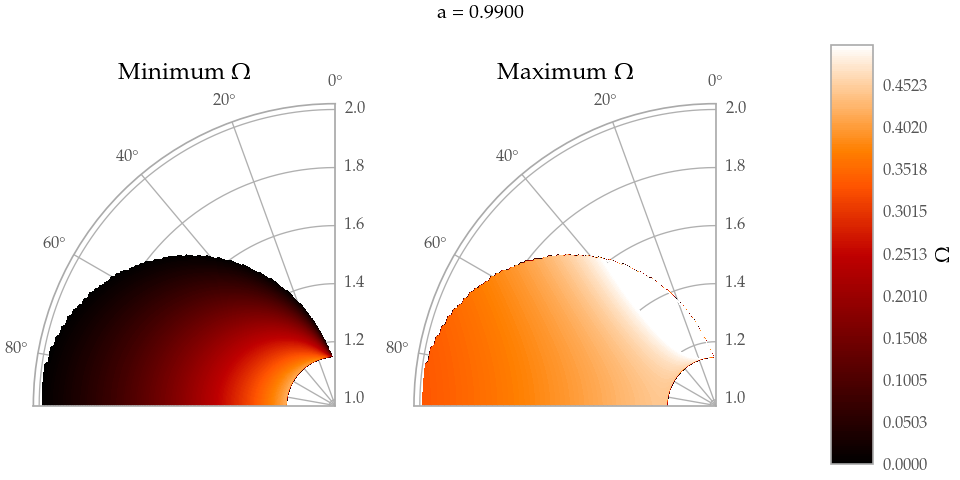

<IPython.core.display.Javascript object>


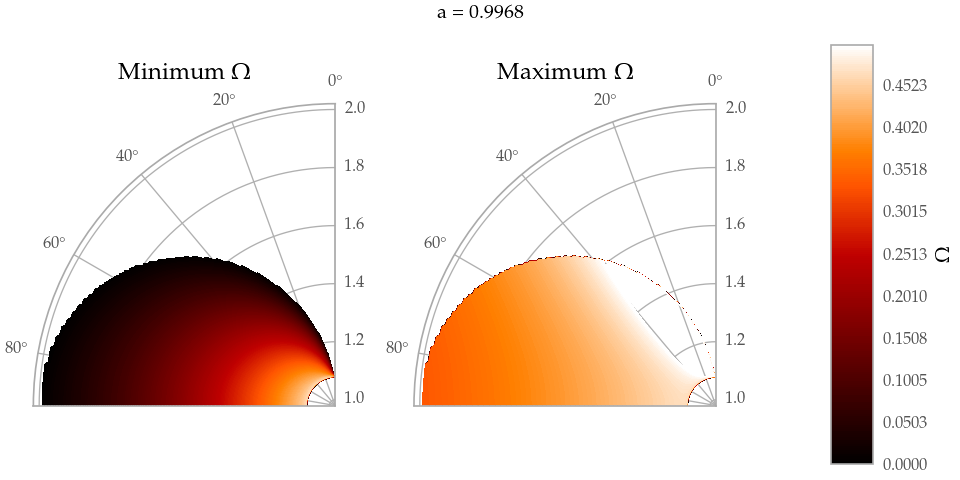

In [35]:
for k in np.arange(.5,3,.5):
    plot(k)
    plt.savefig('../figures/refined_limiting_angle_a_' + f'{(1 - 10**(-k)):.4f}'.replace('.', '_') + '.pdf', format='pdf')